# 2. 퍼셉트론
## 2.1 퍼셉트론이란

- 퍼셉트론은 다수의 신호를 입력으로 받아, 하나의 신호를 출력함 (1은 '신호가 흐른다', 0은 '신호가 흐르지 않는다')
- 퍼셉트론 동작원리 ($X_1, X_2$는 입력신호, $W_1, W_2$는 가중치, $y$는 출력, $\theta$는 임계값)
    > $y = \begin{cases} 0 & (W_1X_1 + W_2X_2 \le \theta) \\ 1 &  (W_1X_1 + W_2X_2 > \theta) && \text{(식2-1)} \end{cases}$

## 2.2 단순한 논리 회로

### 2.2.1 AND 게이트

- AND 게이트 진리표   (테이블 좌측 정렬을 위해 "~/.jupyter/custom/custom.css" 파일에 "table {float: left;}" 추가 함)

> | X<sub>1</sub> | X<sub>2</sub> | y |
|:-:|:-:|:-:|
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |

- AND 게이트 진리표 대로 작동하는 $(W_1, W_2, \theta)$ 값은 $(0.5, 0.5, 0.7), (1.0, 1.0, 1.0)$ 등 무한히 많은 조합이 있음
- 예로, $(W_1, W_2, \theta)$가 $(0.5, 0.5, 0.7)$인 경우, $(X_1, X_2)$가 $(1, 1)$ 일 때만 $W_1X_1 + W_2X_2 = 1$이 되어 $0.7$ 보다 크므로 $y = 1$ 이고, <br>
   $(X_1, X_2)$가 $(0, 0)$이면 $0.0$, $(1, 0)$이면 $0.5$, $(0, 1)$이면 $0.5$가 되므로 각각 $0.7$ 보다 작아서 $y = 0$ 이 되어, 모두 AND 게이트 논리회로를 만족 함

### 2.2.2 NAND 게이트와 OR 게이트

- NAND는 Not AND를 의미. NAND의 $(W_1, W_2, \theta)$ 값도 $(-0.5, -0.5, -0.7)$ 등 무한히 많은 조합이 있음
- AND 게이트를 구현하는 매개변수의 부호를 모두 반전하기만 하면 NAND 게이트라 됨
- 퍼셉트론의 구조는 AND, NAND, OR 게이트 모두에서 똑같음. 세 가지 게이트에서 다른 것은 매개변수(가중치와 임계값)의 값 뿐 임
- **기계학습** 문제는 매개변수의 값을 정하는 작업을 컴퓨터가 자동으로 하도록 함
- **학습**이란 적절한 매개변수 값을 정하는 작업이며, 사람은 퍼셉트론의 구조(모델)을 고민하고 컴퓨터에 학습할 데이터를 주는 일을 함

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [2]:
print(AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1))

0 0 0 1


### 2.3.2 가중치와 편향 도입

- 편항을 도입한 퍼셉트론 공식 ($\theta$를 $-b$로 치환, $-b$는 편향)

 > $y = \begin{cases} 0 & (-b + W_1X_1 + W_2X_2 \le 0) \\ 1 &  (-b + W_1X_1 + W_2X_2 > 0) && \text{(식2-2)} \end{cases}$
 
- 퍼셉트론은 입력신호에 가중치를 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력 함
- 편향을 따로 구분하지 않고, $W_1, W_2, b$ 셋 모두를 가중치라고 할 때도 있음

In [3]:
# AND 게이트의 numpy 계산 예
import numpy as np

X = np.array([0, 1])
W = np.array([0.5, 0.5])
b = -0.7

np.sum(W * X) + b

-0.19999999999999996

- 결과가 0보다 작은 값이기 때문에 y = 0 이 됨 (AND 게이트 논리표를 만족 함)

### 2.3.3 가중치와 편향 구현하기

In [4]:
# 수정된 AND 게이트
def AND(x1, x2):
    X = np.array([x1, x2])
    W = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(W * X) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [5]:
print(AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1))

0 0 0 1


- $W_1, W_2$는 각 입력신호($X_1, X_2)$가 결과에 주는 영향력(중요도)를 조절하는 매개변수 이고, <br/>
   $b$(편향)은 뉴런이 얼마나 쉽게 활성화(결과를 1로 출력) 하느냐를 조정하는 매개변수 임

In [6]:
# NAND 게이트 (AND 게이트와 가중치 만 다르고, 코드는 동일함)
def NAND(x1, x2):
    X = np.array([x1, x2])
    W = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(W * X) + b
    if tmp <= 0:
        return 0
    else:
        return 1

# OR 게이트 (AND 게이트와 가중치 만 다르고, 코드는 동일함)
def OR(x1, x2):
    X = np.array([x1, x2])
    W = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(W * X) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## 2.4 퍼셉트론의 한계

- XOR 게이트는 배타적 논리합 이라는 논리회로 임 ($X_1\text{과 } X_2$ 중 한 쪽이 1일 때만 1을 출력)
- 퍼셉트론으로는 XOR 게이트를 구현할 수 없음. 퍼셉트론은 직선으로 나뉜 두 영역을 만들고, 직선으로 나뉜 한 쪽 영역은 1을 출력하고 다른 쪽 영역은 0을 출력함
- 퍼셉트론은 직선 하나로 나눈 영역 만 표현할 수 있다는 한계가 있음
- OR 게이트를 예로 들면, 가중치 매개변수 $(b, W_1, W_2) = (-0.5, 1.0, 1.0)$ 일때, 퍼셉트론 식으로 표현하면 아래와 같고, OR 게이트 진리표를 만족함
> $y = \begin{cases} 0 & (-0.5 + X_1 + X_2 \le 0) \\ 1 &  (-0.5 + X_1 + X_2 > 0) && \text{(식2-3)} \end{cases}$

In [7]:
# (식2-3)의 OR 게이트 퍼셉트론 시각화 : 빨간색(y=0)과 파란색(y=1) 영역을 하나의 직선으로 구분 가능
import matplotlib.pyplot as plt

points = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0, 1, 1, 1])
line = np.array([[-3, 3.5], [3, -2.5]])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(points[y == 0, 0], points[y == 0, 1], marker='o', color="r", s=10**2)
ax.scatter(points[y == 1, 0], points[y == 1, 1], marker='^', color='b', s=10**2)
plt.plot(line[:, 0], line[:, 1])
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

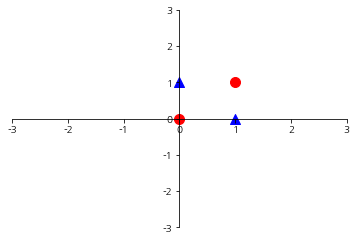

In [8]:
# XOR 게이트 시각화 (하나의 직선으로는 두 영역으로 나눌 수 없음)
points = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0, 1, 1, 0])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(points[y == 0, 0], points[y == 0, 1], marker='o', color="r", s=10**2)
ax.scatter(points[y == 1, 0], points[y == 1, 1], marker='^', color='b', s=10**2)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

## 2.5 다층 퍼셉트론
### 2.5.1 기존 게이트 조합하기

- 퍼셉트론 층을 쌓아 "다층 퍼셉트론"을 만들 수 있음
- XOR 게이트는 AND, NAND, OR 게이트를 조합하는 방법으로 만들 수 있음
> $S_1 = NAND(X_1, X_2) \\ S_2 = OR(X_1, X_2) \\ y = AND(S_1, S_2)$
- XOR 게이트 진리표

> |$X_1$|$X_2$|$S_1$|$S_2$|$y$|
|:---:|:---:|:---:|:---:|:---:|
|0|0|1|0|0|
|1|0|1|1|1|
|0|1|1|1|1|
|1|1|0|1|0|

### 2.5.2 XOR 게이트 구현하기

In [9]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [10]:
print(XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(1, 1))

0 1 1 0


- XOR는 2개 층을 가진 다층 구조의 네트워크(다층 퍼셉트론) 임

## 2.6 NAND에서 컴퓨터까지

- NAND 게이트의 조합 만으로 컴퓨터가 수행하는 일을 재현할 수 있음. 이는 퍼셉트론으로도 컴퓨터를 표현할 수 있다는 의미
- 퍼셉트론은 층을 거듭 쌓으면 비선형적인 표현도 가능하고, 이론상 컴퓨터가 수행하는 처리도 모두 표현할 수 있음